In [2]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scipy.stats import norm


plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 16})

Index(['iTOW', 'UTC', 'tAcc', 'Lon', 'Lat', 'Height', 'HMSL', 'hAcc', 'vAcc',
       'pDOP', 'numSV', 'velN', 'velE', 'velD', 'gspeed', 'headmot', 'sAcc',
       'headAcc', 'fixType', 'fixOK', 'UTCvalid', 'HPvalid', 'diffCorrected'],
      dtype='object')
Index(['iTOW', 'UTC', 'tAcc', 'Lon', 'Lat', 'Height', 'HMSL', 'hAcc', 'vAcc',
       'pDOP', 'numSV', 'velN', 'velE', 'velD', 'gspeed', 'headmot', 'sAcc',
       'headAcc', 'fixType', 'fixOK', 'UTCvalid', 'HPvalid', 'diffCorrected'],
      dtype='object')


(41.320619131, 41.320896398)

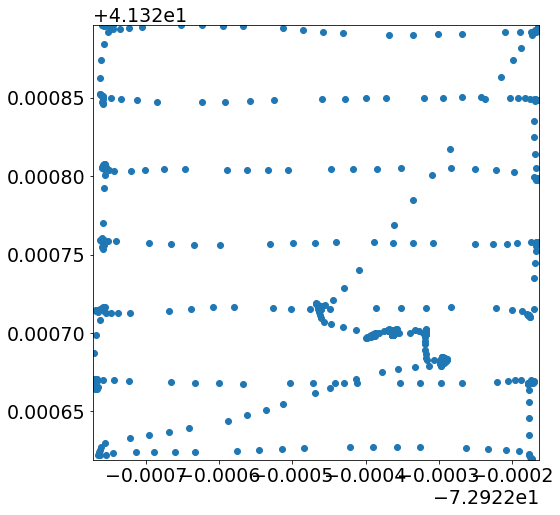

In [7]:
#file_list = ["07082126", "07082136", "07082146", "07082156", "07082206", "07082216", "07082226", "07082236",
#             "07082246", "07082256", "07082306", "07082316", "07082326", "07082336", "07082346", "07082356"]
# 07090006
# 07090016
# 07090026
# 07090036
# 07090046
# 07090056
# 07090106
# 07090116
# 07090126
# 07090136
# 07090146
# 07090156
# 07090206
# 07090216
# 07090226
# 07090236
# 07090246
# 07090256
# 07090306
# 07090316
# 07090326
# 07090336}

file_list = ["11251930", "11251938", "11251946", "11251955", "11252003", "11252011", "11252020", "11252028"]
dfs = [];

df = pd.read_csv("./rover/"+file_list[0],sep=",",header=0)
df = df.assign(UTC = pd.to_datetime(df.UTC))

for fname in file_list[:]:
    new_df = pd.read_csv("./rover/"+fname, sep=',', header=0)
    dfs.append(new_df)

print(df.columns)
print(dfs[0].columns)
    
#df.reset_index(drop=True, inplace=True)
#df = df[:1100]
fig = plt.figure()
#plt.plot(dfs[2].HMSL)
df = df[700:950]
plt.scatter(dfs[2].Lon, dfs[2].Lat)
plt.xlim(min(dfs[2].Lon), max(dfs[2].Lon))
plt.ylim(min(dfs[2].Lat), max(dfs[2].Lat))

In [4]:
MAPBOX_KEY = "pk.eyJ1IjoiYW5uaWVwb2xpc2giLCJhIjoiY2p5b3BwdXl3MTdhdzNjdDRjbGw5MWJ6ciJ9.01NjskBuc2SQcm5QjbyLwA"
MAPBOX_STYLE = "cjypy1k7x0ru71cjva7cs5iwz"
MAPBOX_USERNAME = "anniepolish"
PLOT_BG = cimgt.MapboxStyleTiles(MAPBOX_KEY, MAPBOX_USERNAME, MAPBOX_STYLE)
BORDER = 0.00005

i = 7

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
ax.set_extent([min(dfs[i].Lon)-BORDER, max(dfs[i].Lon)+BORDER, min(dfs[i].Lat)-BORDER, max(dfs[i].Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
ax.add_image(PLOT_BG, 20, interpolation='spline36')

# plot the data, transformed into the coordinate system of our plot
plt.plot(dfs[i].Lon, dfs[i].Lat, 'c', linewidth=2, transform=ccrs.Geodetic(), label="GPS")

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



TypeError: got an unexpected keyword argument 'interpolation'

<Figure size 576x576 with 1 Axes>

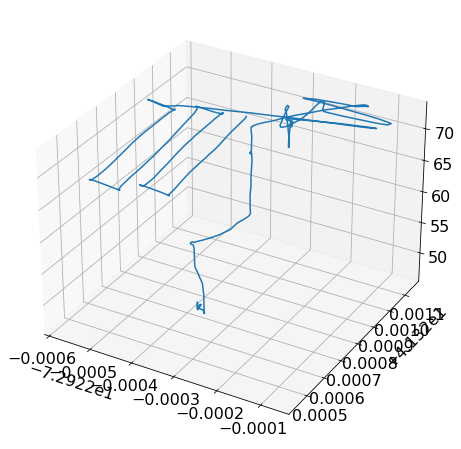

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dfs[0][10:-50].Lon, dfs[0][10:-50].Lat, dfs[0][10:-50].HMSL)
plt.savefig("3d_shaketest.png")
plt.show()

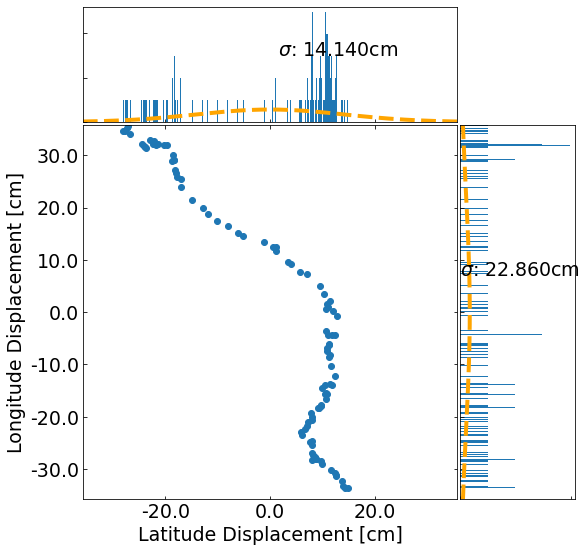

In [8]:
plt.rcParams.update({'font.size': 19})

lat_arr = df["Lat"].values
lon_arr = df["Lon"].values

# convert each of the latitude and longitude arrays into a displacement from mean, in meters
center_lat = np.mean(lat_arr)
center_lon = np.mean(lon_arr)
lat_disp, lon_disp = [], []
for lat in lat_arr:
    disp = geopy.distance.distance((center_lat, center_lon), (lat, center_lon)).m*100.
    if (lat < center_lat): disp = -1.*disp
    lat_disp.append(disp)
for lon in lon_arr:
    disp = geopy.distance.distance((center_lat, center_lon), (center_lat, lon)).m*100.
    if (lon < center_lon): disp = -1.*disp
    lon_disp.append(disp)    

x = lat_disp
y = lon_disp

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
label_gap = 0.02


rect_scatter = [label_gap+left, bottom, width, height]
rect_histx = [label_gap+left, bottom + height + spacing, width, 0.2]
rect_histy = [label_gap+left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_scatter.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_scatter.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelleft=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelbottom=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.2
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))
#ax_scatter.yaxis.set_ticks([-0.5,0,0.5])
#ax_scatter.grid()


bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins, density=True)
ax_histy.hist(y, bins=bins, orientation='horizontal', density=True)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

# make and add gaussian fits
lat_mu, lat_sigma = norm.fit(lat_disp)
lon_mu, lon_sigma = norm.fit(lon_disp)
ax_histx.plot(bins, norm.pdf(bins, lat_mu, lat_sigma), '--', color='orange', linewidth=4)
ax_histy.plot(norm.pdf(bins, lon_mu, lon_sigma), bins, '--', color='orange', linewidth=4)
ax_histx.text(1.5, 0.15, "$\sigma$: %.3fcm"%lat_sigma)
ax_histy.text(0., 7, "$\sigma$: %.3fcm"%lon_sigma)

# LABELS LABELS LABELS
ax_scatter.set_xlabel("Latitude Displacement [cm]")
ax_scatter.set_ylabel("Longitude Displacement [cm]")

plt.show()
